## Proyecto TSFC: Oscilaciones en Sistemas Biológicos

## Comportamiento de Testosterona

### Hernández de la Vega Alejandro
### Rodríguez Rosenblueth César Daniel
### Santiago Santos Eva Yazmín 

Para una primera aproximación se utiliza el siguiente modelo:

![Diagrama del modelo](Imagenes/Diagramas/Diagram1.png)

$$ \frac{dR}{dt} = f(T)-b_{1}R$$
$$ \frac{dL}{dt} = g_{1}R-b_{2}L $$
$$ \frac{dT}{dt} = g_{2}L-b_{3}T $$

Donde L(t) es la concentración de hormona luteinizing (LH) en el sistema, R(t) representa la concentración de la hormona que libera hormona luteinizing (LHRH) y T(t), la concentración de testosterona(T) en el macho. 

Matemáticamente $b_{1}$, $b_{2}$, $b_{3}$, $g_{1}$, $g_{2}$ son parámetros positivos. Biológicamente $g_{1}$,$g_{2}$ y $f(T)$ son las tasas de secreción de las hormonas LHRH, LH y T respectivamente. Además  $g_{1}$,$g_{2}$ son los valores de prealimentación para R y L respectivamente, mientras que f(T) es una función de retroalimentación para las dos hormonas precursoras. Por tanto deben estar representadas por funciones monótonas crecientes. Por otro lado $b_{1}$, $b_{2}$, $b_{3}$ represetan la tasa de difussión de las hormonas

A este modelo general se le llama "feedback repression model". Para los puntos de estabilidad se tiene lo siguiente:

![Teorema de Estabilidad](Imagenes/Teoremas/Theorem1.png)



Alrededor del punto de equilibrio se tiene:

$$ \frac{dx}{dt} = f'(T_{0})z(t) - b_{1}x(t) $$
$$ \frac{dy}{dt} = g_{1}x(t) - b_{2}y(t) $$
$$ \frac{dz}{dt} = g_{2}y(t-\tau)-b_{3}z(t) $$

Donde
$$ z(t)=T(t)-T_{0} $$
$$ y(t)=L(t)-L_{0} $$
$$ x(t)=R(t)-R_{0} $$

### Notas
Hay que revisar lso valroes que da el artículo para K, son a partir de los cuales se encuentran las constantes de equilibrio para las tres funciones. Adicionalmente están dados en términos de las otras cinco variables de propocionalidad de la ecuación. 

De igual manera falta entender bien el valor de 'p' o 'm' (valor en el artículo y valor en el libro.)

Agregar las descripciones biológicas de L,T y R

In [1]:
using PyPlot
using TaylorSeries

In [2]:
function h_find(x::Array,p::Int)
    h1 = (1/10)*(eps(1.0)/abs(x[p+1]))^(1/p)
    h2 = (1/10)*(eps(1.0)/abs(x[p]))^(1/(p-1))
    if h1 - h2 >= 0
        return h2
    else
        return h1
    end
end

h_find (generic function with 1 method)

In [3]:
evaluate(Taylor1([5,1],10),2)

7

In [4]:
Taylor1(2,2)

 2 + 𝒪(t³)

In [5]:
exp(ans)

 7.38905609893065 + 𝒪(t³)

In [6]:
function Testosterone1(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    b1=1.29
    b2=0.97
    b3=1.39
    
    g1=10
    g2=0.7
    A=2
    K=1
    m=12
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        for i in range(1,p)
            fT=A/(K+TT^m)
            RT.coeffs[i+1] = fT.coeffs[i]-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
    end
    return (t,R,L,T)
end

Testosterone1 (generic function with 1 method)

In [7]:
Testosterone1(1.0,2.0,3.0,5,0.0,10.0);

In [8]:
t=Testosterone1(1.0,2.0,3.0,5,0.0,10.0)[1];
R=Testosterone1(1.0,2.0,3.0,5,0.0,10.0)[2];
L=Testosterone1(1.0,2.0,3.0,5,0.0,10.0)[3];
T=Testosterone1(1.0,2.0,3.0,5,0.0,10.0)[4];

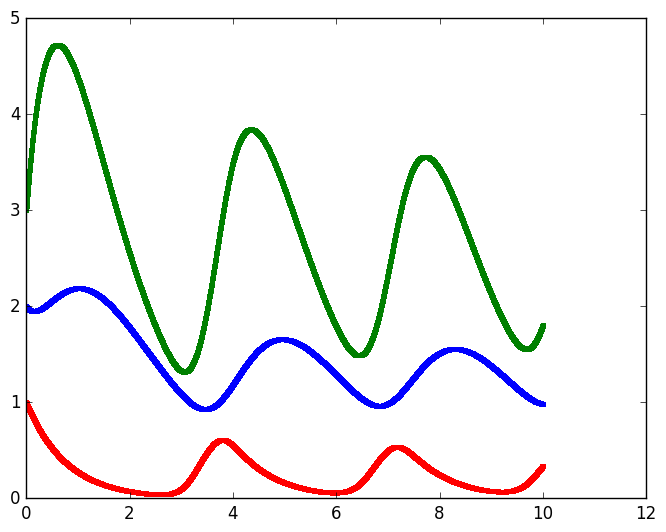

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3181f7908>

In [9]:
plot(t,R,"r.")
plot(t,T, "b.")
plot(t,L, "g.")

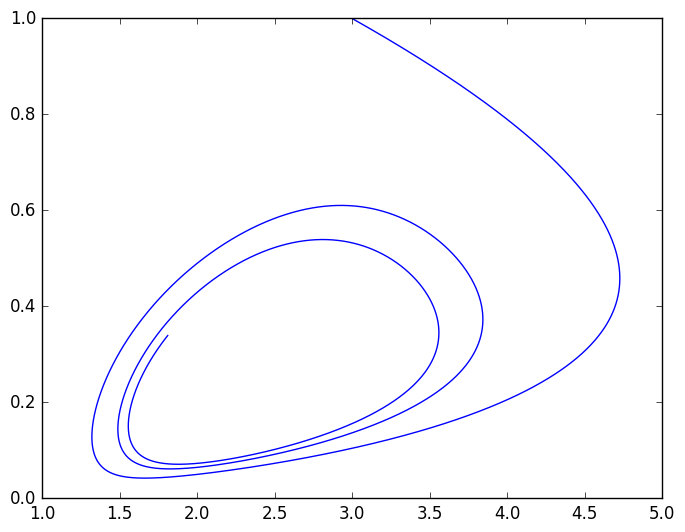

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x323e01eb8>

In [10]:
plot(L,R)

In [11]:
function Castration(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    b1=1.29
    b2=0.97
    b3=1.39
    
    g1=10
    g2=0.0
    A=2
    K=1
    m=12
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        for i in range(1,p)
            fT=A/(K+TT^m)
            RT.coeffs[i+1] = fT.coeffs[i]-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
    end
    return (t,R,L,T)
end

Castration (generic function with 1 method)

In [12]:
t_castration=Castration(1.0,2.0,3.0,5,0.0,10.0)[1];
R_castration=Castration(1.0,2.0,3.0,5,0.0,10.0)[2];
L_castration=Castration(1.0,2.0,3.0,5,0.0,10.0)[3];
T_castration=Castration(1.0,2.0,3.0,5,0.0,10.0)[4];

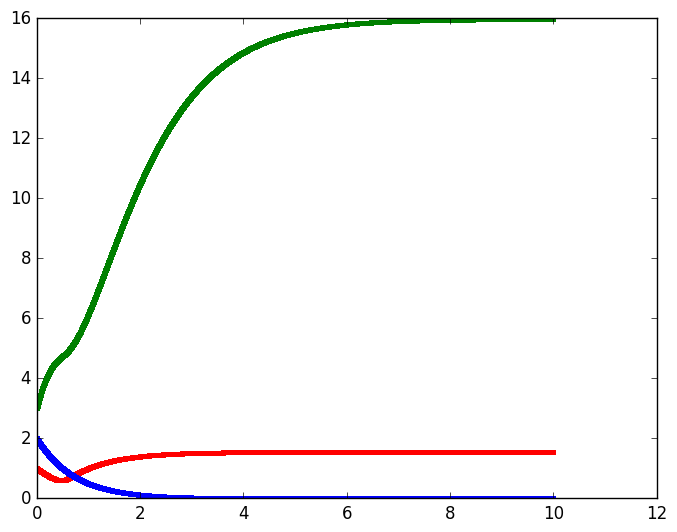

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x33103ba20>

In [13]:
plot(t_castration,R_castration,"r.")
plot(t_castration,T_castration, "b.")
plot(t_castration,L_castration, "g.")

Curiosamente se utiliza el mismo tipo de ecuación para describir la ezquisofrenia catatónica periódica. Cronin (1973,1976) propuso:

$$
f(t) = (c-ht)(1-H(t-c/h))
$$

Donde H(z) es la función de Heaveside y c,h son constantes.

In [14]:
#Heaviside
function H(x)
    if x>0
        return 1
    else
        return 0
    end
end

H (generic function with 1 method)

In [15]:
H(0)

0

In [16]:
function f_schizophrenia(c,h,t)
    (c-h*t)*(1-H(t-c/h))
end

f_schizophrenia (generic function with 1 method)

In [17]:
function Schizophrenia(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    b1=1.29
    b2=0.97
    b3=1.39
    
    g1=10
    g2=0.7
    
    c=2
    h_f=1
    
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        fT=Taylor1(f_schizophrenia(c,h_f,T0),p)
        for i in range(1,p)
            RT.coeffs[i+1] = fT.coeffs[i]/i-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
    end
    return (t,R,L,T)
end

Schizophrenia (generic function with 1 method)

In [18]:
t_s=Schizophrenia(1.0,2.0,3.0,5,0.0,10.0)[1];
R_s=Schizophrenia(1.0,2.0,3.0,5,0.0,10.0)[2];
L_s=Schizophrenia(1.0,2.0,3.0,5,0.0,10.0)[3];
T_s=Schizophrenia(1.0,2.0,3.0,5,0.0,10.0)[4];

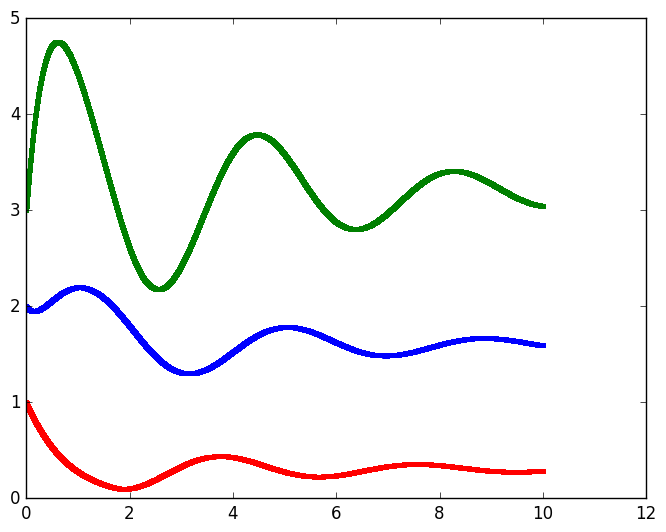

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32e562710>

In [19]:
plot(t_s,R_s,"r.")
plot(t_s,T_s, "b.")
plot(t_s,L_s, "g.")

In [20]:
function Schizophrenia_Pituitary_Repression(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    b1=1.29
    b2=0.97
    b3=1.39
    
    g1=10
    g2=0.7
    
    c=2
    h_f=1
    
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    
    Wt=c*b3/h_f-0.5
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        fT=Taylor1(f_schizophrenia(c,h_f,T0),p)
        WtT=Taylor1(Wt,p)
        for i in range(1,p)
            RT.coeffs[i+1] = fT.coeffs[i]/i-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i+WtT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
    end
    return (t,R,L,T)
end

Schizophrenia_Pituitary_Repression (generic function with 1 method)

In [21]:
Taylor1(2,58)+Taylor1([2,2,2],58)

 4 + 2 t + 2 t² + 𝒪(t⁵⁹)

In [22]:
t_sp=Schizophrenia_Pituitary_Repression(1.0,2.0,3.0,5,0.0,40.0)[1];
R_sp=Schizophrenia_Pituitary_Repression(1.0,2.0,3.0,5,0.0,40.0)[2];
L_sp=Schizophrenia_Pituitary_Repression(1.0,2.0,3.0,5,0.0,40.0)[3];
T_sp=Schizophrenia_Pituitary_Repression(1.0,2.0,3.0,5,0.0,40.0)[4];

Como dice el artículo para valores de $w_{t} > \frac{cb_{3}}{h} $ L y R se van a cero comprobando lo descrito en [2], y para valores menores se tiene una osiclación de esas variables. T por otro lado debe tender al valor de $ \frac{W_{t}}{b_{3}}  $

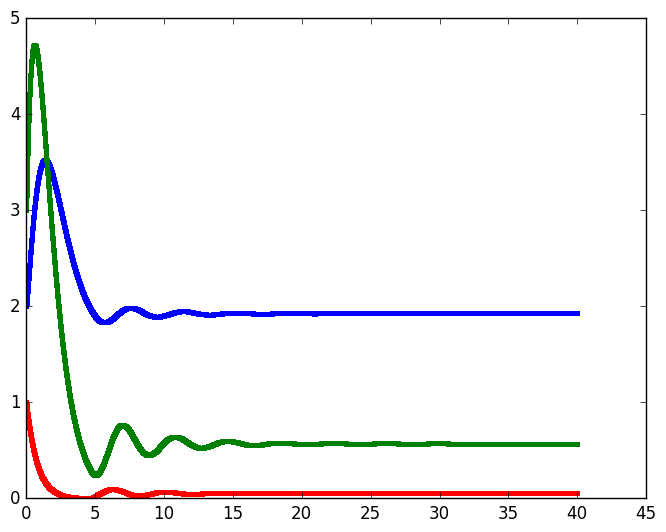

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32fbc5ef0>

In [23]:
plot(t_sp,R_sp,"r.")
plot(t_sp,T_sp, "b.")
plot(t_sp,L_sp, "g.")

Referencias:

[1] Murray, J. D. 1989. Mathematical Biology. Volume 19. 

[2] Smith, William R. "Hypothalamic regulation of pituitary secretion of luteinizing hormone—II feedback control of gonadotropin secretion." Bulletin of Mathematical Biology 42.1 (1980): 57-78.

#### Pubertad

La pubertad está causada por uno o una combinación de los siguientes factores:

(i) Un incremento de la sensibilidad pituitaria para LHRH 

(ii) Un incremento de la sensibilidad gonadal para LH

(iii) Un incremento de la sensibilidad hipotálamica hacia la retroalimentación negativa de la testosterona

(iv) Un incremento en la tasa de secreción tónica de LHRH del hipotálamo

In [24]:
function Pubertad1(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    b1=1.29
    b2=0.97
    b3=1.39
    
    g1=10
    g2=0.7
    
    c=2
    h_f=1
    
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        fT=Taylor1(f_schizophrenia(c,h_f,T0),p)
        for i in range(1,p)
            RT.coeffs[i+1] = fT.coeffs[i]/i-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
        g1 = g1+3*h
    end
    return (t,R,L,T)
end

Pubertad1 (generic function with 1 method)

In [25]:
t_p1=Pubertad1(1.0,2.0,3.0,5,0.0,20.0)[1];
R_p1=Pubertad1(1.0,2.0,3.0,5,0.0,20.0)[2];
L_p1=Pubertad1(1.0,2.0,3.0,5,0.0,20.0)[3];
T_p1=Pubertad1(1.0,2.0,3.0,5,0.0,20.0)[4];

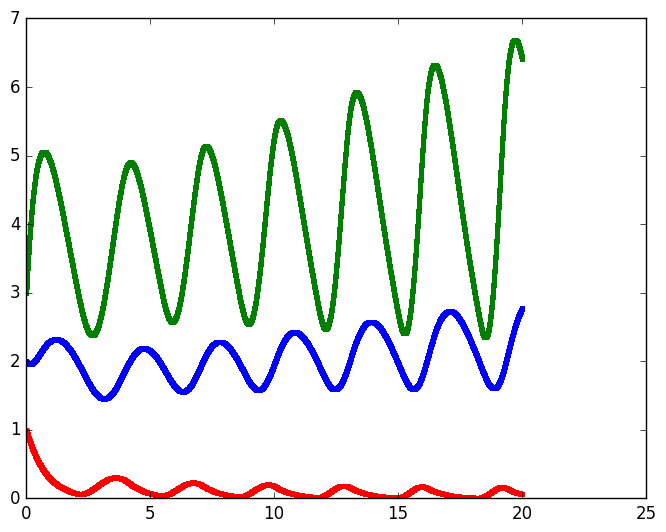

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32fc890b8>

In [26]:
plot(t_p1,R_p1,"r.")
plot(t_p1,T_p1, "b.")
plot(t_p1,L_p1, "g.")

In [27]:
function Pubertad2(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    b1=1.29
    b2=0.97
    b3=1.39
    
    g1=10
    g2=0.7
    
    c=2
    h_f=1
    
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        fT=Taylor1(f_schizophrenia(c,h_f,T0),p)
        for i in range(1,p)
            RT.coeffs[i+1] = fT.coeffs[i]/i-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
        g2 = g2+3*h
    end
    return (t,R,L,T)
end

Pubertad2 (generic function with 1 method)

In [28]:
t_p2=Pubertad2(1.0,2.0,3.0,5,0.0,20.0)[1];
R_p2=Pubertad2(1.0,2.0,3.0,5,0.0,20.0)[2];
L_p2=Pubertad2(1.0,2.0,3.0,5,0.0,20.0)[3];
T_p2=Pubertad2(1.0,2.0,3.0,5,0.0,20.0)[4];

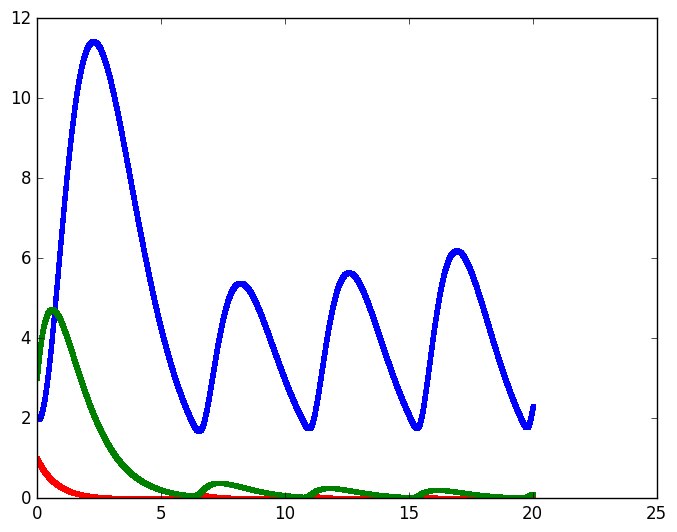

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32e633828>

In [29]:
plot(t_p2,R_p2,"r.")
plot(t_p2,T_p2, "b.")
plot(t_p2,L_p2, "g.")

In [30]:
function Pubertad3(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    b1=1.29
    b2=0.97
    b3=1.39
    
    g1=10
    g2=0.7
    
    c=2
    h_f=1
    
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        fT=Taylor1(f_schizophrenia(c,h_f,T0),p)
        for i in range(1,p)
            RT.coeffs[i+1] = fT.coeffs[i]/i-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
        h_f = h_f+h
    end
    return (t,R,L,T)
end

Pubertad3 (generic function with 1 method)

In [31]:
t_p3=Pubertad3(1.0,2.0,3.0,5,0.0,20.0)[1];
R_p3=Pubertad3(1.0,2.0,3.0,5,0.0,20.0)[2];
L_p3=Pubertad3(1.0,2.0,3.0,5,0.0,20.0)[3];
T_p3=Pubertad3(1.0,2.0,3.0,5,0.0,20.0)[4];

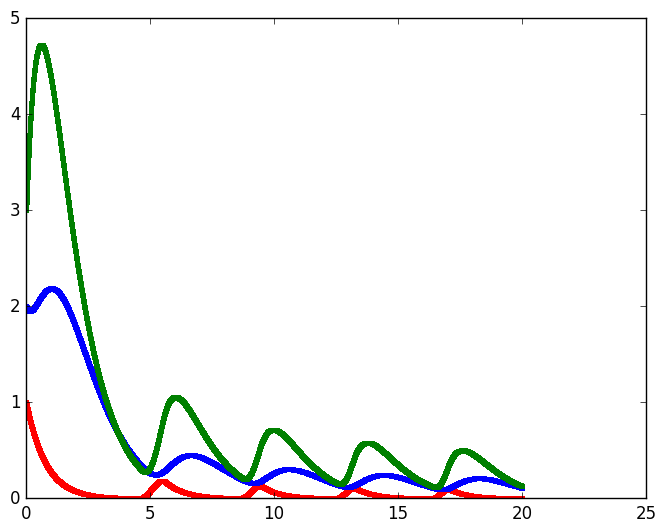

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32e633a20>

In [32]:
plot(t_p3,R_p3,"r.")
plot(t_p3,T_p3, "b.")
plot(t_p3,L_p3, "g.")

In [36]:
function Pubertad4(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    b1=1.29
    b2=0.97
    b3=1.39
    
    g1=10
    g2=0.7
    
    c=2
    h_f=1
    
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        fT=Taylor1(f_schizophrenia(c,h_f,T0),p)
        for i in range(1,p)
            RT.coeffs[i+1] = fT.coeffs[i]/i-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
        c = c + h
    end
    return (t,R,L,T)
end

Pubertad4 (generic function with 1 method)

In [37]:
t_p4=Pubertad4(1.0,2.0,3.0,5,0.0,20.0)[1];
R_p4=Pubertad4(1.0,2.0,3.0,5,0.0,20.0)[2];
L_p4=Pubertad4(1.0,2.0,3.0,5,0.0,20.0)[3];
T_p4=Pubertad4(1.0,2.0,3.0,5,0.0,20.0)[4];

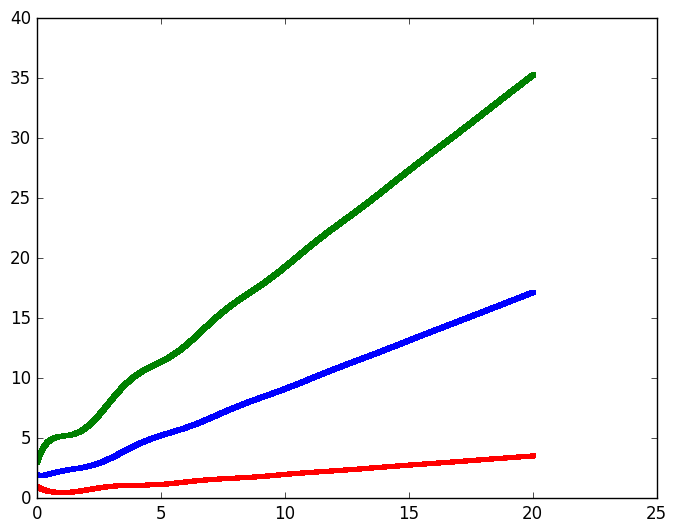

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x310c3c160>

In [38]:
plot(t_p4,R_p4,"r.")
plot(t_p4,T_p4, "b.")
plot(t_p4,L_p4, "g.")